In [29]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install numpy 

In [31]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install ploty

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty


In [35]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from tabulate import tabulate

# Load data from CSV file
file_path = 'c:/Users/user/Downloads/Quote-Equity-SAIL-EQ-18-01-2023-to-18-01-2024.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date '])

# Assume your dataset has a 'Close' column
close_prices = df['close '].values

# Calculate Daily Returns
df['Daily_Return'] = (df['close '] - df['OPEN ']) / df['OPEN ']

# Use the z-score method for anomaly detection on daily returns
mean_return = np.mean(df['Daily_Return'].dropna())
std_dev_return = np.std(df['Daily_Return'].dropna())
z_scores_return = (df['Daily_Return'] - mean_return) / std_dev_return

# Set a threshold for anomaly detection
threshold_return = 1  # Adjust as needed

# Identify anomalies based on the threshold
df['Anomalies_Return'] = np.abs(z_scores_return) > threshold_return

# Create a line graph using Plotly
fig = go.Figure()

# Line graph for close prices
fig.add_trace(go.Scatter(x=df['Date'], y=close_prices, mode='lines', name='Close Price'))

# Red dots for anomalies
anomaly_dates = df[df['Anomalies_Return']]['Date']
anomaly_prices = close_prices[df['Anomalies_Return']]
fig.add_trace(go.Scatter(x=anomaly_dates, y=anomaly_prices, mode='markers', marker=dict(color='red'), name='Anomalies'))

# Update layout to display only the year on the x-axis
fig.update_xaxes(type='category', tickmode='array', tickvals=df['Date'].dt.year.unique(), ticktext=df['Date'].dt.year.unique(), tickformat='%Y')

# Display the plot
fig.update_layout(title='Stock Price with Anomalies Detected in Daily Returns', xaxis_title='Year', yaxis_title='Close Price')
fig.show()

# Print rows corresponding to anomalies using tabulate
anomaly_rows = df[df['Anomalies_Return']]
print("Rows corresponding to anomalies:")
print(tabulate(anomaly_rows, headers='keys', tablefmt='simple'))

C:\Users\user\AppData\Local\Temp\ipykernel_8804\2452708158.py:11: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Rows corresponding to anomalies:
     Date      series       OPEN     HIGH     LOW     PREV. CLOSE     ltp     close     vwap     52W H     52W L   VOLUME        VALUE               No of trades     Date                   Daily_Return  Anomalies_Return
---  --------  ---------  -------  -------  ------  --------------  ------  --------  -------  --------  --------  ------------  ------------------  ---------------  -------------------  --------------  ------------------
  0  18-01-23  EQ           87.5     91.2    87.35           87.15   90.6      90.7     89.89    112.35     63.6   3,90,56,707   3,51,09,38,489.55   91,836           2023-01-18 00:00:00       0.0365714  True
  1  19-01-23  EQ           90.45    93.9    90              90.7    92        92.1     92.45    112.35     63.6   6,34,81,359   5,86,89,64,140.80   1,54,561         2023-01-19 00:00:00       0.0182421  True
  4  24-01-23  EQ           92.95    93.15   90.7            93.1    90.85     91       91.57    112.35     6

 Aggregate Statistics

In [36]:
import pandas as pd
import numpy as np


# Assume your dataset is stored in a column named 'value'
data = df['close '].values

# Z-Score Method
mean = np.mean(data)
std_dev = np.std(data)
z_scores = (data - mean) / std_dev
threshold_z = 1  # Adjust as needed
anomalies_z = np.abs(z_scores) > threshold_z

# MAD Method
median = np.median(data)
mad = np.median(np.abs(data - median))
mad_scores = 0.6745 * (data - median) / mad
threshold_mad = 2  # Adjust as needed
anomalies_mad = np.abs(mad_scores) > threshold_mad

# Display or save the results
df['Anomalies_Z'] = anomalies_z
df['Anomalies_MAD'] = anomalies_mad

# Assuming you have columns 'Date', 'Value', 'Anomalies_Z', 'Anomalies_MAD'
anomalies_z = df[df['Anomalies_Z']]
anomalies_mad = df[df['Anomalies_MAD']]
non_anomalies = df[~(df['Anomalies_Z'] | df['Anomalies_MAD'])]

# Aggregate statistics
aggregate_stats_anomalies_z = anomalies_z['close '].describe()
aggregate_stats_anomalies_mad = anomalies_mad['close '].describe()
aggregate_stats_non_anomalies = non_anomalies['close '].describe()

# Print aggregate statistics
print("Aggregate Statistics for Anomalies (Z-Score):")
print(aggregate_stats_anomalies_z)

print("\nAggregate Statistics for Anomalies (MAD):")
print(aggregate_stats_anomalies_mad)

print("\nAggregate Statistics for Non-Anomalies:")
print(aggregate_stats_non_anomalies)


Aggregate Statistics for Anomalies (Z-Score):
count     30.000000
mean     112.463333
std        8.745234
min       80.800000
25%      110.975000
50%      113.875000
75%      116.575000
max      124.700000
Name: close , dtype: float64

Aggregate Statistics for Anomalies (MAD):
count     36.000000
mean     110.808333
std        8.119118
min       98.900000
25%      102.500000
50%      113.075000
75%      115.450000
max      124.700000
Name: close , dtype: float64

Aggregate Statistics for Non-Anomalies:
count    211.000000
mean      87.250948
std        4.022153
min       81.200000
25%       84.075000
50%       86.550000
75%       89.950000
max       98.650000
Name: close , dtype: float64


In [37]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date '])

# Assuming you have columns 'Date', 'Value', 'Anomalies_Z', 'Anomalies_MAD'
anomalies_z = df[df['Anomalies_Z']]
anomalies_mad = df[df['Anomalies_MAD']]
non_anomalies = df[~(df['Anomalies_Z'] | df['Anomalies_MAD'])]

# Group data by week and calculate aggregate statistics for each week
def aggregate_weekly_stats(data):
    data['Week'] = data['Date'].dt.strftime('%U-%Y')  # Group by week and year
    weekly_stats = data.groupby('Week')['close '].describe()
    return weekly_stats

# Aggregate statistics for anomalies (Z-Score) on a weekly basis
weekly_stats_anomalies_z = aggregate_weekly_stats(anomalies_z)

# Aggregate statistics for anomalies (MAD) on a weekly basis
weekly_stats_anomalies_mad = aggregate_weekly_stats(anomalies_mad)

# Aggregate statistics for non-anomalies on a weekly basis
weekly_stats_non_anomalies = aggregate_weekly_stats(non_anomalies)

# Print weekly statistics
print("Weekly Statistics for Anomalies (Z-Score):")
print(weekly_stats_anomalies_z)

print("\nWeekly Statistics for Anomalies (MAD):")
print(weekly_stats_anomalies_mad)

print("\nWeekly Statistics for Non-Anomalies:")
print(weekly_stats_non_anomalies)

Weekly Statistics for Anomalies (Z-Score):
         count      mean       std     min       25%      50%      75%     max
Week                                                                          
00-2024    1.0  124.7000       NaN  124.70  124.7000  124.700  124.700  124.70
02-2024    4.0  115.0875  3.066316  113.05  113.0875  113.875  115.875  119.55
04-2024    1.0  123.0000       NaN  123.00  123.0000  123.000  123.000  123.00
08-2024    1.0  119.1000       NaN  119.10  119.1000  119.100  119.100  119.10
13-2023    1.0   80.8000       NaN   80.80   80.8000   80.800   80.800   80.80
13-2024    1.0  118.6500       NaN  118.65  118.6500  118.650  118.650  118.65
15-2023    1.0  102.7500       NaN  102.75  102.7500  102.750  102.750  102.75
17-2024    1.0  116.9500       NaN  116.95  116.9500  116.950  116.950  116.95
19-2023    1.0  101.7500       NaN  101.75  101.7500  101.750  101.750  101.75
30-2024    1.0  114.3000       NaN  114.30  114.3000  114.300  114.300  114.30
35-2024  

C:\Users\user\AppData\Local\Temp\ipykernel_8804\1577660538.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\user\AppData\Local\Temp\ipykernel_8804\1577660538.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_8804\1577660538.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipyk

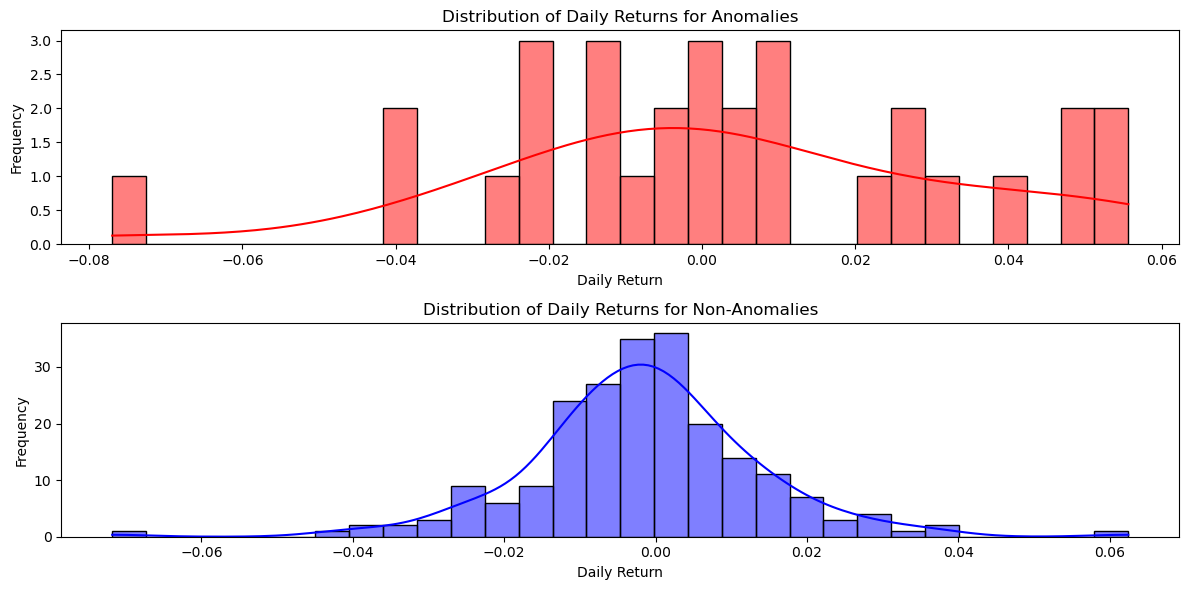

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Separate anomalies and non-anomalies
anomalies = df[df['Anomalies_Z']]
non_anomalies = df[~df['Anomalies_Z']]

# Plot histograms for anomalies and non-anomalies separately
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.histplot(anomalies['Daily_Return'], bins=30, kde=True, color='red')
plt.title('Distribution of Daily Returns for Anomalies')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
sns.histplot(non_anomalies['Daily_Return'], bins=30, kde=True, color='blue')
plt.title('Distribution of Daily Returns for Non-Anomalies')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [39]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


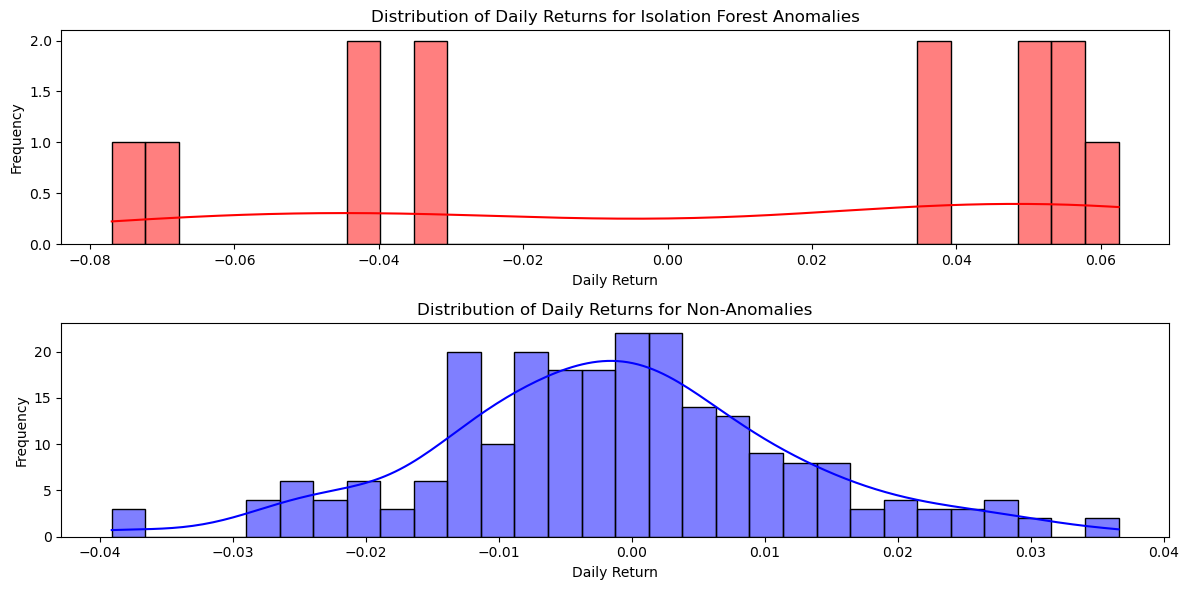

Rows corresponding to Isolation Forest anomalies:
          Date   OPEN   close   Daily_Return  Anomalies_Isolation_Forest
45  2023-03-24   85.05   82.35     -0.031746                           1
70  2023-05-05   85.70   82.70     -0.035006                           1
115 2023-10-07   87.00   90.05      0.035057                           1
140 2023-08-14   91.00   87.10     -0.042857                           1
153 2023-01-09   91.25   96.95      0.062466                           1
154 2023-04-09   97.75  102.75      0.051151                           1
160 2023-12-09  101.00   93.75     -0.071782                           1
223 2023-12-14  105.10  110.95      0.055661                           1
227 2023-12-20  112.35  103.70     -0.076992                           1
228 2023-12-21  103.85  109.00      0.049591                           1
232 2023-12-28  116.40  122.85      0.055412                           1
245 2024-01-16  115.05  119.55      0.039113                           1
2

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Temporal Analysis (Weekly Statistics)
def aggregate_weekly_stats(data):
    data['Week'] = data['Date'].dt.strftime('%U-%Y')  # Group by week and year
    weekly_stats = data.groupby('Week')['Daily_Return'].describe()
    return weekly_stats

weekly_stats_all = aggregate_weekly_stats(df)

# Prepare data for Isolation Forest (use only numeric features)
data_for_isolation_forest = df[['Daily_Return']].values

# Apply Isolation Forest
clf = IsolationForest(contamination=0.05)  # Adjust contamination parameter
df['Isolation_Forest_Score'] = clf.fit_predict(data_for_isolation_forest)

# Mark anomalies based on Isolation Forest predictions
df['Anomalies_Isolation_Forest'] = (df['Isolation_Forest_Score'] == -1).astype(int)

# Plot histograms for anomalies and non-anomalies separately
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.histplot(df[df['Anomalies_Isolation_Forest'] == 1]['Daily_Return'], bins=30, kde=True, color='red')
plt.title('Distribution of Daily Returns for Isolation Forest Anomalies')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
sns.histplot(df[df['Anomalies_Isolation_Forest'] == 0]['Daily_Return'], bins=30, kde=True, color='blue')
plt.title('Distribution of Daily Returns for Non-Anomalies')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print rows corresponding to Isolation Forest anomalies
anomaly_rows_isolation_forest = df[df['Anomalies_Isolation_Forest'] == 1]
print("Rows corresponding to Isolation Forest anomalies:")
print(anomaly_rows_isolation_forest[['Date', 'OPEN ', 'close ', 'Daily_Return', 'Anomalies_Isolation_Forest']])

In [41]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import plotly.graph_objects as go
from prettytable import PrettyTable

# Features for Isolation Forest
features = ['Daily_Return', 'vwap ', 'HIGH ', 'LOW ']  # Add other features as needed

# Select features for Isolation Forest
X = df[features]

# Fit Isolation Forest model
isolation_forest_model = IsolationForest(contamination=0.05)  # Adjust contamination parameter
df['Anomaly_Prediction'] = isolation_forest_model.fit_predict(X)

# Merge results from statistical methods and Isolation Forest
df['Final_Anomaly'] = np.logical_or.reduce([df['Anomalies_Z'], df['Anomalies_MAD'], df['Anomaly_Prediction'] == -1])

# Create an interactive graph using Plotly
fig = go.Figure()

# Line graph for close prices
fig.add_trace(go.Scatter(x=df['Date'], y=df['close '], mode='lines', name='Close Price'))

# Red dots for final anomalies
final_anomaly_dates = df[df['Final_Anomaly']]['Date']
final_anomaly_prices = df[df['Final_Anomaly']]['close ']
fig.add_trace(go.Scatter(x=final_anomaly_dates, y=final_anomaly_prices, mode='markers', marker=dict(color='red'), name='Final Anomalies'))

# Update layout to display only the year on the x-axis
fig.update_xaxes(type='category', tickmode='array', tickvals=df['Date'].dt.year.unique(), ticktext=df['Date'].dt.year.unique(), tickformat='%Y')

# Display the plot
fig.update_layout(title='Stock Price with Final Anomalies Detected', xaxis_title='Year', yaxis_title='Close Price')
fig.show()

In [43]:
# Display all columns without truncation and provide horizontal scrollbar
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Print rows corresponding to final anomalies
final_anomaly_rows = df[df['Final_Anomaly']]
print("Rows corresponding to Final Anomalies:")
print(final_anomaly_rows)

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

Rows corresponding to Final Anomalies:
        Date  series    OPEN    HIGH     LOW   PREV. CLOSE     ltp   close   \
47   28-03-23      EQ   81.25   81.85   80.65         81.20   80.95   80.80   
153  01-09-23      EQ   91.25   97.50   90.85         90.70   97.05   96.95   
154  04-09-23      EQ   97.75  103.65   97.70         96.95  102.60  102.75   
155  05-09-23      EQ  103.15  103.25   99.85        102.75  101.85  101.75   
156  06-09-23      EQ  101.75  102.35   98.40        101.75   99.25   99.30   
157  07-09-23      EQ   99.10  100.55   97.45         99.30   99.50   99.55   
158  08-09-23      EQ  100.00  100.40   98.00         99.55   99.00   98.90   
159  11-09-23      EQ   99.50  100.60   98.80         98.90  100.00   99.95   
160  12-09-23      EQ  101.00  102.05   93.10         99.95   93.85   93.75   
217  06-12-23      EQ   96.60  101.10   95.50         95.75   99.45   99.35   
218  07-12-23      EQ   99.80  100.35   98.15         99.35   98.90   98.95   
220  11-12-23